This notebook plots the final within-patient beta diversity plots.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fjsdlong = '/Users/claire/github/aspiration-analysis/data/analysis/jsd.txt'

jsd = pd.read_csv(fjsdlong, sep='\t')
jsd.head()

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.400324,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.993353,gastric_fluid,throat_swab,gastric_fluid-throat_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-112-7GI,01-164-7GI,0.994055,gastric_fluid,gastric_fluid,gastric_fluid-gastric_fluid,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-112-7GI,01-164-7RI,0.575080,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-112-7GI,01-164-7TI,0.995439,gastric_fluid,throat_swab,gastric_fluid-throat_swab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
jsd = jsd.query('patient_comp == "within"')
jsd['mbs_consolidated'] = jsd['mbs_consolidated'].fillna('Not tested')

In [4]:
neworder = ['bal-throat_swab', 'bal-gastric_fluid', 
            'gastric_fluid-throat_swab', 'stool-throat_swab']

# How many site comparisons are duplicate?
jsd\
    .query('site_comparison == @neworder')\
    .groupby(['subject', 'site_comparison'])\
    .size()\
    .sort_values(ascending=False)\
    .head(25)

subject   site_comparison          
14-233-0  gastric_fluid-throat_swab    1
04-067-2  bal-gastric_fluid            1
04-054-3  gastric_fluid-throat_swab    1
04-061-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-062-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-063-7  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-064-5  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-066-0  bal-gastric_fluid            1
          bal-throat_swab              1
04-054-3  bal-throat_swab              1
          bal-gastric_fluid            1
04-050-1  bal-gastric_fluid            1
04-009-2  bal-gastric_fluid            1
03-149-1  stool-throat_swab            1
03-153-7  stool-throat_swab            1
03-156-7  stool-throa

In [5]:
jsd.query('subject == "03-146-6"')

,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
50959,03-146-6SI,03-146-6TI,0.993326,stool,throat_swab,stool-throat_swab,within,03-146-6,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## Keep only comparisons from the same time point

## Get rid of comparisons where sample1 and sample2 end in F/I or I/F, respectively
#cleanjsd = jsd[
#    ~(
#        (jsd['sample1'].str.endswith('F') & jsd['sample2'].str.endswith('I')) 
#        | (jsd['sample2'].str.endswith('F') & jsd['sample1'].str.endswith('I'))
#     )]

# Also get rid of any "final" stool or throat samples - keep only the baseline samples
# (This code also de-facto gets rid of any un-matched samples)
cleanjsd = jsd[
    ~(  jsd['sample1'].str.endswith('F') 
      | jsd['sample2'].str.endswith('F')
      | jsd['sample1'].str.endswith('2')
      | jsd['sample2'].str.endswith('2')
      | jsd['sample1'].str.endswith('F2T')
      | jsd['sample2'].str.endswith('F2T')
      | jsd['sample1'].str.endswith('sick')
      | jsd['sample2'].str.endswith('sick')
      | jsd['sample1'].str.startswith('05')
      | jsd['sample2'].str.startswith('05')
     )]


In [7]:
jsd.shape, cleanjsd.shape

((307, 39), (307, 39))

In [8]:
## Check that we don't have any extra comparisons
cleanjsd\
    .query('site_comparison == @neworder')\
    .groupby(['subject', 'site_comparison'])\
    .size()\
    .sort_values(ascending=False)\
    .head(20)

subject   site_comparison          
14-233-0  gastric_fluid-throat_swab    1
04-067-2  bal-gastric_fluid            1
04-054-3  gastric_fluid-throat_swab    1
04-061-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-062-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-063-7  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-064-5  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-066-0  bal-gastric_fluid            1
          bal-throat_swab              1
04-054-3  bal-throat_swab              1
          bal-gastric_fluid            1
04-050-1  bal-gastric_fluid            1
dtype: int64

## Make the basic plot

Okay, I think I should give up on coloring each site combination and just focus on the points.

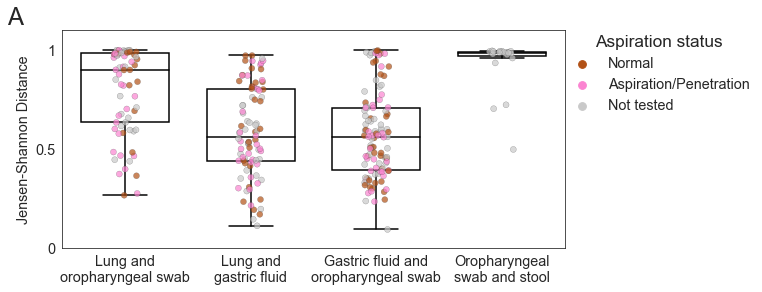

In [9]:
hue_order = ['Normal', 'Aspiration/Penetration', 'Not tested']
pal = {'bal_throat': '#0DA5B3', 
       'bal_gastric': '#823E98', 
       'gastric_throat': '#EAA72E', 
       'stool_throat': '#785C2B',
       'Not tested': '#C9C9C9',
       'Normal': '#B25116',
       'Aspiration/Penetration': '#FB84D1'}

boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

sns.set_style('white')
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(data=cleanjsd, x='site_comparison', y='beta', 
            fliersize=0, order=neworder, ax=ax,
            color='1.0', width=0.7, hue_order=hue_order,
            **{'boxprops': boxprops, 'medianprops': lineprops,
                   'whiskerprops': lineprops, 'capprops': lineprops})
sns.stripplot(data=cleanjsd, x='site_comparison', y='beta', 
              order=neworder, ax=ax, hue_order=hue_order,
              hue='mbs_consolidated', dodge=False, palette=pal,
              jitter=True, size=6, linewidth=0.25, alpha=0.7)

# Axes
ax.set_xticklabels(['Lung and\noropharyngeal swab', 
                    'Lung and\ngastric fluid', 
                    'Gastric fluid and\noropharyngeal swab', 
                    'Oropharyngeal\nswab and stool'],
                  fontsize='x-large')
ax.set_ylim([0, 1.1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize='x-large')

# Legend
lgd = ax.legend(bbox_to_anchor=(0.98, 0.8), 
                loc='center left', fontsize='x-large',
                frameon=False)
lgd.set_title('Aspiration status', prop={'size': 'xx-large'})

# Labels and stuff
#ax.set_title('Intra-patient beta diversity', fontsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('Jensen-Shannon Distance', fontsize='x-large')

txt = ax.text(-0.11, 1.025, 'A', transform=ax.transAxes, fontsize=24)

fig.savefig('../../final/figures/figure3.within_patient_beta_div.png', 
            bbox_extra_artists=(lgd,txt), bbox_inches='tight',
            dpi=200)


## Calculate pvalues

In [10]:
from scipy.stats import ranksums

asp = 'Aspiration/Penetration'
nml = 'Normal'

for s1 in neworder:
    x = cleanjsd.query('site_comparison == @s1')['beta']
    for s2 in neworder[neworder.index(s1)+1:]:
        y = cleanjsd.query('site_comparison == @s2')['beta']
        print(s1, s2, ranksums(x, y))

('bal-throat_swab', 'bal-gastric_fluid', RanksumsResult(statistic=5.888157832183511, pvalue=3.905240794107661e-09))
('bal-throat_swab', 'gastric_fluid-throat_swab', RanksumsResult(statistic=6.1976221753181795, pvalue=5.732253980272454e-10))
('bal-throat_swab', 'stool-throat_swab', RanksumsResult(statistic=-2.7958988577230963, pvalue=0.005175559466615869))
('bal-gastric_fluid', 'gastric_fluid-throat_swab', RanksumsResult(statistic=0.5229440849369232, pvalue=0.6010131648539743))
('bal-gastric_fluid', 'stool-throat_swab', RanksumsResult(statistic=-5.995014609390513, pvalue=2.0346714984822055e-09))
('gastric_fluid-throat_swab', 'stool-throat_swab', RanksumsResult(statistic=-5.836090374553058, pvalue=5.343991707302448e-09))


# Sample size info

The following table shows the number of samples for each site combination (`count` column), and the mean, std, min, max, etc... values for the JSD for each site combination.

In [11]:
cleanjsd\
    .query('site_comparison == @neworder')\
    .groupby('site_comparison')\
    ['beta']\
    .describe()\
    .loc[neworder]

,count,mean,std,min,25%,50%,75%,max
site_comparison,,,,,,,,
bal-throat_swab,73.0,0.799284,0.217254,0.264794,0.633249,0.899155,0.982116,0.999192
bal-gastric_fluid,88.0,0.584126,0.228679,0.110166,0.437159,0.558804,0.800441,0.971833
gastric_fluid-throat_swab,111.0,0.569775,0.216765,0.091874,0.394670,0.559988,0.707127,0.997144
stool-throat_swab,20.0,0.931639,0.132615,0.496519,0.971556,0.985464,0.991883,0.995249


This table shows the same info as above, but now split by aspiration status.

In [12]:
cleanjsd\
    .query('site_comparison == @neworder')\
    .groupby(['site_comparison', 'mbs_consolidated'])\
    ['beta']\
    .describe()\
    .loc[neworder]

count      mean       std  \
site_comparison           mbs_consolidated                                    
bal-gastric_fluid         Aspiration/Penetration   29.0  0.596145  0.227648   
                          Normal                   28.0  0.635848  0.256038   
                          Not tested               31.0  0.526168  0.195390   
bal-throat_swab           Aspiration/Penetration   25.0  0.741328  0.231293   
                          Normal                   23.0  0.850347  0.219465   
                          Not tested               25.0  0.810262  0.194493   
gastric_fluid-throat_swab Aspiration/Penetration   32.0  0.552445  0.216020   
                          Normal                   35.0  0.572962  0.236467   
                          Not tested               44.0  0.579843  0.204961   
stool-throat_swab         Not tested               20.0  0.931639  0.132615   

                                                       min       25%  \
site_comparison           mbs_consolidated                             
bal-gastric_fluid         Aspiration/Penetration  0.213271  0.439093   
                          Normal                  0.168299  0.436976   
                          Not tested              0.110166  0.416222   
bal-throat_swab           Aspiration/Penetration  0.273774  0.576516   
                          Normal                  0.264794  0.830355   
                          Not tested              0.436750  0.633337   
gastric_fluid-throat_swab Aspiration/Penetration  0.232833  0.386861   
                          Normal                  0.242831  0.369075   
                          Not tested              0.091874  0.426915   
stool-throat_swab         Not tested              0.496519  0.971556   

                                                       50%       75%       max  
site_comparison           mbs_consolidated                                      
bal-gastric_fluid         Aspiration/Penetration  0.521811  0.812021  0.945293  
                          Normal                  0.677829  0.839242  0.971833  
                          Not tested              0.533604  0.635737  0.956460  
bal-throat_swab           Aspiration/Penetration  0.819795  0.961231  0.999192  
                          Normal                  0.975509  0.987917  0.995874  
                          Not tested              0.910519  0.985789  0.999149  
gastric_fluid-throat_swab Aspiration/Penetration  0.529691  0.707906  0.982951  
                          Normal                  0.508747  0.704559  0.997144  
                          Not tested              0.587063  0.690847  0.993353  
stool-throat_swab         Not tested              0.985464  0.991883  0.995249

## Patients and samples used

In [13]:
cleanjsd.groupby(['site_comparison', 'mbs_consolidated']).size()

site_comparison            mbs_consolidated      
bal-gastric_fluid          Aspiration/Penetration    29
                           Normal                    28
                           Not tested                31
bal-throat_swab            Aspiration/Penetration    25
                           Normal                    23
                           Not tested                25
gastric_fluid-rectal_swab  Not tested                 9
gastric_fluid-throat_swab  Aspiration/Penetration    32
                           Normal                    35
                           Not tested                44
rectal_swab-throat_swab    Not tested                 6
stool-throat_swab          Not tested                20
dtype: int64

In [14]:
cleanjsd['subject'].unique().shape

(163,)

### Write the patients to file

In [15]:
# Actually, not interested in this - just want the samples
#all_subjs = set(cleanjsd['subject'])
#with open('../../data/patients/figure3.within_patient_beta_div.subjects.txt', 'w') as f:
#    f.write('\n'.join(all_subjs))

### Samples

In [16]:
all_samples = list(set(
        cleanjsd\
            .query('site_comparison == @neworder')\
            ['sample1']\
            .tolist() 
        + cleanjsd\
            .query('site_comparison == @neworder')\
            ['sample2']\
            .tolist()))
with open('../../data/patients/figure3.within_patient_beta_div.samples.txt', 'w') as f:
    f.write('\n'.join(all_samples))

## Figure for presentation

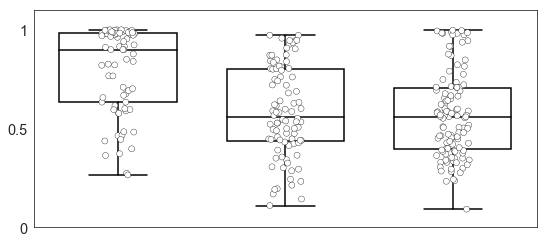

In [17]:
neworder = ['bal-throat_swab', 'bal-gastric_fluid', 
            'gastric_fluid-throat_swab']

boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

sns.set_style('white')
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(data=cleanjsd, x='site_comparison', y='beta', 
            fliersize=0, order=neworder, ax=ax,
            color='1.0', width=0.7, hue_order=hue_order,
            **{'boxprops': boxprops, 'medianprops': lineprops,
                   'whiskerprops': lineprops, 'capprops': lineprops})

sns.stripplot(data=cleanjsd, x='site_comparison', y='beta', 
              order=neworder, ax=ax, hue_order=hue_order,
              jitter=True, size=6, linewidth=0.35, #alpha=0.01,
              color='w', edgecolor='k')

# Axes
#ax.set_xticklabels(['Lung and\noropharyngeal swab', 
#                    'Lung and\ngastric fluid', 
#                    'Gastric fluid and\noropharyngeal swab', 
#                    'Oropharyngeal\nswab and stool'],
#                  fontsize='x-large')
ax.set_xticklabels('')
ax.set_ylim([0, 1.1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize='x-large')


# Labels and stuff
#ax.set_title('Intra-patient beta diversity', fontsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig('../../final/figures/presentation_figure3.within_patient_beta_div.png', dpi=200)